In [1]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 9.5.5a

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/12/18  
"""
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; IE=(q*q)/(2*pi*hbar);
Ef = 0.1; kT = 0.025;

#inputs
a = 3e-10; t0 = (hbar**2)/(2*m*(a**2)*q);

In [2]:
#Hamiltonian matrix
NS = 15; NC = 20; ND = 15
Np = NS + NC + ND
T = 2*t0*np.eye(Np) - t0*eye(Np,k=1) - t0*eye(Np,k=-1)
UB = 0*ones((Np)) #no barrier
T = T + np.diag(UB)

#Bias
V  = 0
mu1 = Ef + (V/2)
mu2 = Ef - (V/2)
U1 = V*hstack((0.5*ones(NS),linspace(0.5,-0.5,NC),-0.5*ones(ND));
U1 = transpose(U1); #Applied potential profile

#Energy grid for Green’s function method
NE = 501
E = linspace(-0.2,0.8,NE)
zplus=1j*1e-12
dE = E[1]-E[0]
f1 = 1/(1+exp((E-mu1)/kT));
f2 = 1/(1+exp((E-mu2)/kT));

#Initializing arrays
TM=zeros((NE));

#Transmission
I=0; #Current

for k in range (0,NE):
    sig1=zeros((Np,Np),dtype=complex)
    sig2=zeros((Np,Np),dtype=complex)
    sig3=zeros((Np,Np),dtype=complex)

    ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0))
    ka=cmath.acos(ck); sig1[0,0]=-t0*exp(1j*ka)
        gam1=1j*(sig1-conj(transpose(sig1)))
    
    ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0))
    ka=cmath.acos(ck); sig2[Np-1,Np-1]=-t0*exp(1j*ka)
    gam2=1j*(sig2-conj(transpose(sig2)))
              
    G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
    TM[k]=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
    I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));

XX = a*1e9*(array(list(range(1,Np+1)))); 
XS = XX[0:NS-4]; 
XD = XX[NS+NC+5-1:Np];

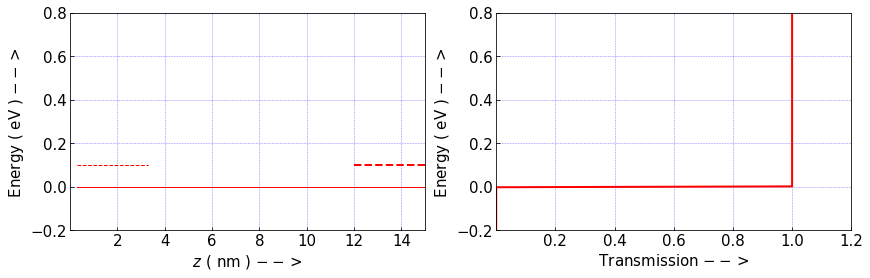

In [3]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,U1+UB,'r',lw=1)
plot(XS,mu1*ones((NS-4)),'r--',lw=1)
plot(XD,mu2*ones((ND-4)),'r--',lw=2)
xlabel(' $z$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,15); 
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(2,16,2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(TM,E,'r',lw=2)
xlabel(' Transmission $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1.2)
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.4,0.2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)